## 1. Import required Libraries 

In [95]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


## Load the Dataset

In [81]:
creditcard_df = pd.read_csv("../data/raw/creditcard.csv")
print(creditcard_df)



            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

## 2. Data Cleaning

### Check Dataset Structure

In [96]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280922 entries, 0 to 280921
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   V1             280922 non-null  float64
 1   V2             280922 non-null  float64
 2   V3             280922 non-null  float64
 3   V4             280922 non-null  float64
 4   V5             280922 non-null  float64
 5   V6             280922 non-null  float64
 6   V7             280922 non-null  float64
 7   V8             280922 non-null  float64
 8   V9             280922 non-null  float64
 9   V10            280922 non-null  float64
 10  V11            280922 non-null  float64
 11  V12            280922 non-null  float64
 12  V13            280922 non-null  float64
 13  V14            280922 non-null  float64
 14  V15            280922 non-null  float64
 15  V16            280922 non-null  float64
 16  V17            280922 non-null  float64
 17  V18            280922 non-nul

### Check Missing Values

In [97]:
creditcard_df.isnull().sum()


V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
Class            0
hour             0
scaled_amount    0
dtype: int64

### handle Missing Values

In [85]:
num_cols = creditcard_df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = creditcard_df.select_dtypes(include=["object"]).columns

for col in num_cols:
    creditcard_df[col].fillna(creditcard_df[col].median(), inplace=True)                
for col in cat_cols:
    creditcard_df[col].fillna(creditcard_df[col].mode()[0], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_4332\103034597.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  creditcard_df[col].fillna(creditcard_df[col].median(), inplace=True)


### Remove Duplicates

In [77]:
import os
import pandas as pd

creditcard_df = creditcard_df.drop_duplicates()


output_folder = r'C:\Users\HP\Desktop\Tenx_challenge_folder\fraud-detection\data\processed' 
output_path = os.path.join(output_folder, 'creditcard_cleaned.csv')
creditcard_df.to_csv(output_path, index=False)
print(f"File saved successfully to: {output_path}")

File saved successfully to: C:\Users\HP\Desktop\Tenx_challenge_folder\fraud-detection\data\processed\creditcard_cleaned.csv


## Correct Data Types

In [101]:
creditcard_df.dtypes


V1               float64
V2               float64
V3               float64
V4               float64
V5               float64
V6               float64
V7               float64
V8               float64
V9               float64
V10              float64
V11              float64
V12              float64
V13              float64
V14              float64
V15              float64
V16              float64
V17              float64
V18              float64
V19              float64
V20              float64
V21              float64
V22              float64
V23              float64
V24              float64
V25              float64
V26              float64
V27              float64
V28              float64
Class              int64
hour             float64
scaled_amount    float64
dtype: object

In [86]:
# Returns the total count of duplicate rows

creditcard_df = pd.read_csv("../data/processed/creditcard_cleaned.csv")
duplicate_count = creditcard_df.duplicated().sum()

print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
creditcard_df['scaled_amount'] = scaler.fit_transform(creditcard_df['Amount'].values.reshape(-1,1))
# Drop original Time and Amount
creditcard_df.drop(['Time', 'Amount'], axis=1, inplace=True)

KeyError: 'Amount'

## Exploratory Data Analysis (EDA)

## 3.1 Univariate Analysis

### Fraud vs Non-Fraud Distribution (Class Imbalance)

In [103]:
class_counts = creditcard_df["Class"].value_counts()

print(class_counts)


Class
0    280449
1       473
Name: count, dtype: int64


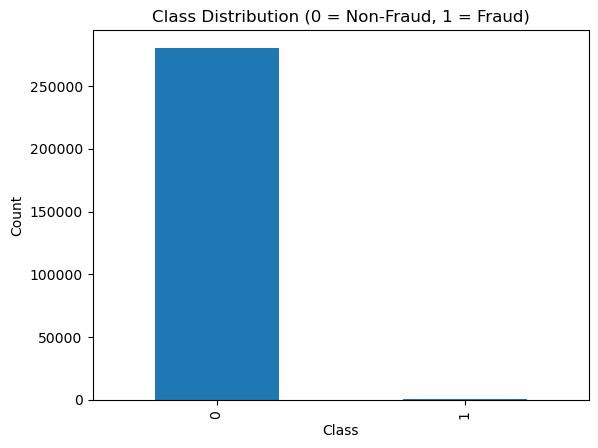

In [104]:
plt.figure()
class_counts.plot(kind="bar")
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


## Transaction Amount Distribution

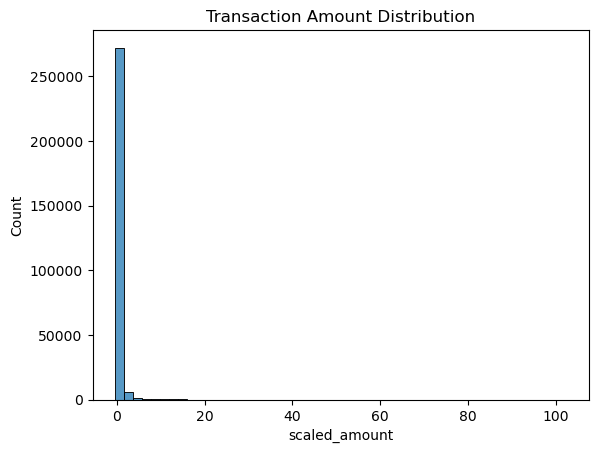

In [106]:
plt.figure()
sns.histplot(creditcard_df["scaled_amount"], bins=50)
plt.title("Transaction Amount Distribution")
plt.show()


## Bivariate Analysis

### Amount vs Fraud

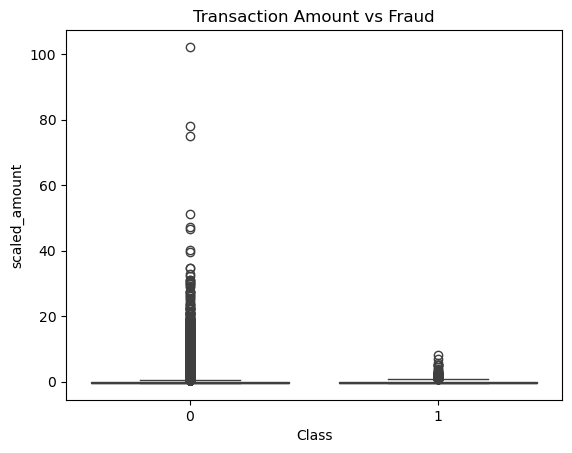

In [108]:
plt.figure()
sns.boxplot(x="Class", y="scaled_amount", data=creditcard_df)
plt.title("Transaction Amount vs Fraud")
plt.show()


### Class Imbalance Quantification

In [109]:
fraud_ratio = class_counts[1] / class_counts.sum()
print(f"Fraud Ratio: {fraud_ratio:.6f}")


Fraud Ratio: 0.001684


# Feature Engineering (Dataset-Appropriate)

## Time-Based Feature Engineering

### Transaction Velocity Feature

In [138]:
creditcard_df = creditcard_df.sort_values("hour")

creditcard_df["tx_count_1hr"] = (
    creditcard_df["hour"]
    .rolling(window=3600, min_periods=1)
    .count()
)


### Amount Transformation

In [140]:
creditcard_df["log_amount"] = np.log1p(creditcard_df["scaled_amount"])


# Data Transformation

## Separate Features and Target

In [141]:
X = creditcard_df.drop(columns=["Class"])
y = creditcard_df["Class"]


## Feature Scaling

In [144]:
scale_cols = ["hour", "scaled_amount", "tx_count_1hr", "log_amount"]

scaler = StandardScaler()
X[scale_cols] = scaler.fit_transform(X[scale_cols])


# Handle Class Imbalance

## Class Distribution Before Resampling

In [145]:
print("Before SMOTE:")
print(y.value_counts())


Before SMOTE:
Class
0    280449
1       473
Name: count, dtype: int64


## Apply SMOTE (Training Data Only)

In [151]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


c:\Users\HP\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\HP\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\HP\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

## Class Distribution After Resampling

In [152]:
print("After SMOTE:")
print(pd.Series(y_resampled).value_counts())


After SMOTE:
Class
0    280449
1    280449
Name: count, dtype: int64


In [154]:
print("Final shape:", X.shape)
creditcard_df = pd.read_csv("../data/processed/creditcard_cleaned.csv")


Final shape: (280922, 32)
